In [1]:
%autosave 20
import math 
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# from matplotlib.colors import ListedColormap
# from sklearn.utils import shuffle
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Autosaving every 20 seconds


In [2]:
list_sensor=pd.read_csv("list_sensor1.csv", delimiter=",",names=["id","factor"])
list_units=pd.read_csv("list_units1.csv", delimiter=",",names=["id","factor"]) 
list_type=pd.read_csv("list_types1.csv", delimiter=",",names=["id","factor"]) 
# df=pd.read_csv("Sample dataset values1.csv",delimiter=",", 
#                     names=["packet_no","Sensor","Type","Units","time","Flag","Value","Key"])
# df = shuffle(df)
# df.to_csv("Sample dataset values1.csv",mode="w",index=False)
df=pd.read_csv("C:/Users/HP/OneDrive - Newcastle University/Dissertation/Data_sets/Sample dataset values1.csv")
df.head(5)
df.shape
total_row=df.shape[0]
trial_row=int(total_row-(total_row*0.30))
print("total rows")
print(trial_row)

,Sensor,Type,Units,time,Flag,Value
0,PER_AIRMON_MESH301245,PM 4,ugm -3,13/05/2020 10:36,0.0,4.020000
1,PER_EMOTE_1309,CO,ugm -3,2020-05-27 21:11:38,0.0,326.695543
2,PER_EMOTE_1309,Temperature,Celsius,14/05/2020 17:15,0.0,17.300000
3,PER_AIRMON_MESH1911150,PM1,ugm -3,2020-05-17 05:56:00,0.0,3.296000
4,PER_AIRMON_MESH1911150,PM1,ugm -3,2020-05-21 06:41:00,0.0,3.951000


(418807, 6)

total rows
293164


In [3]:
def factorize(obj,obj_list,table,data):
    print(data[obj].unique())
    data_s=pd.DataFrame(data[obj].unique())
    
    new_sensor = data_s[~data_s[0].isin(obj_list.id)]
    ns=[]
    if(len(new_sensor)>0):
        l=len(obj_list)
        for s in new_sensor[0]:
            n=[s,l]
            l=l+1
            ns.append(n)
        ns=pd.DataFrame(ns,columns=["id","factor"])
        ns.to_csv(table,mode='a', header=False,index=False)

    obj_list=pd.read_csv(table,delimiter=",",names=["id","factor"])
    l=len(obj_list)
    for i in range(0,l):
        data.loc[data[obj]==obj_list.id[i],obj]=obj_list.factor[i]
    print(data[obj].unique())

In [4]:
factorize('Sensor',list_sensor,'list_sensor1.csv',df)

['PER_AIRMON_MESH301245' 'PER_EMOTE_1309' 'PER_AIRMON_MESH1911150']
[2 1 0]


In [5]:
factorize('Type',list_type,'list_types1.csv',df)

['PM 4' 'CO' 'Temperature' 'PM1' 'NO2' 'Humidity' 'Sound' 'PM2.5' 'PM10'
 'NO' 'O3' 'Pressure']
[ 0  2  1  8  7  6  5  3  4 10  9 11]


In [6]:
factorize('Units',list_units,'list_units1.csv',df)

['ugm -3' 'Celsius' '%' 'db' 'ppb' 'hpa']
[0 1 3 2 4 5]


In [7]:
df.loc[df['Flag']==False,'Flag']=0
df.loc[df['Flag']==True,'Flag']=1

In [8]:
x=['Sensor', 'Type', 'Units','Value']
y=['Flag']
train=df.loc[1:trial_row,]
test=df.loc[trial_row+1:total_row,]
train.shape
test.shape

(293164, 6)

(125642, 6)

In [9]:
print(train['Flag'].value_counts())
print(test['Flag'].value_counts())

0.0    291598
1.0      1566
Name: Flag, dtype: int64
0.0    124977
1.0       665
Name: Flag, dtype: int64


In [10]:
x_train,y_train,x_test,y_test = train[x],train[y],test[x],test[y]

In [11]:
train['Flag'].value_counts()
test['Flag'].value_counts()

0.0    291598
1.0      1566
Name: Flag, dtype: int64

0.0    124977
1.0       665
Name: Flag, dtype: int64

In [12]:
#confusion Matrix
def ConfusionMatrix(x,y):
    a = confusion_matrix(x,y)
    print(a)
    b = (a[0][0]+a[1][1])/(a[1][1]+a[0][1]+a[0][0]+a[1][0])
    return round(b*100,2)

In [13]:
#Decision Tree
decision = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
decision_yhat = decision.predict(x_test)

# type(decision_yhat)
# print("zeros",(decision_yhat == 0).sum())
# print("ones",(decision_yhat == 1).sum())

print(decision.score(x_test,y_test))

decision_acc= ConfusionMatrix(decision_yhat,y_test)
print(decision_acc)




0.9999920408780504
[[124977      1]
 [     0    664]]
100.0


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<Figure size 1800x720 with 0 Axes>

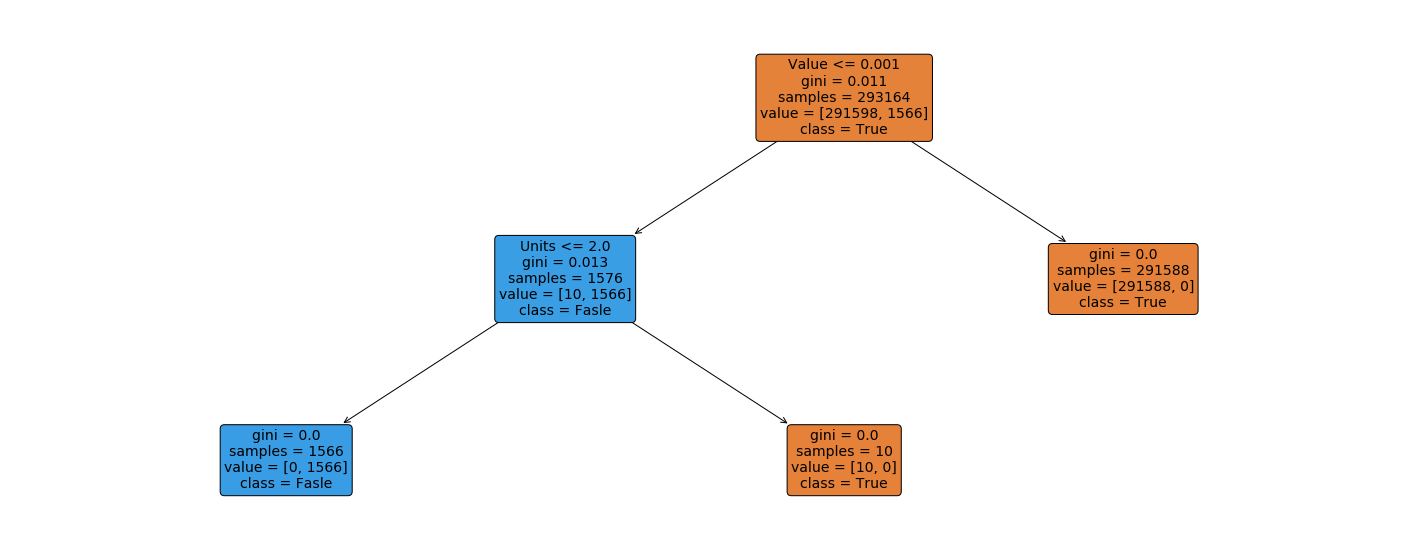

In [14]:
decision = DecisionTreeClassifier(max_depth=3)
decision.fit(x_train, y_train)

plt.figure(figsize=(25,10))
a = plot_tree(decision, 
              feature_names=x, 
              class_names=(['True','Fasle']),
              filled=True, 
              rounded=True, 
              fontsize=14)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<Figure size 1800x720 with 0 Axes>

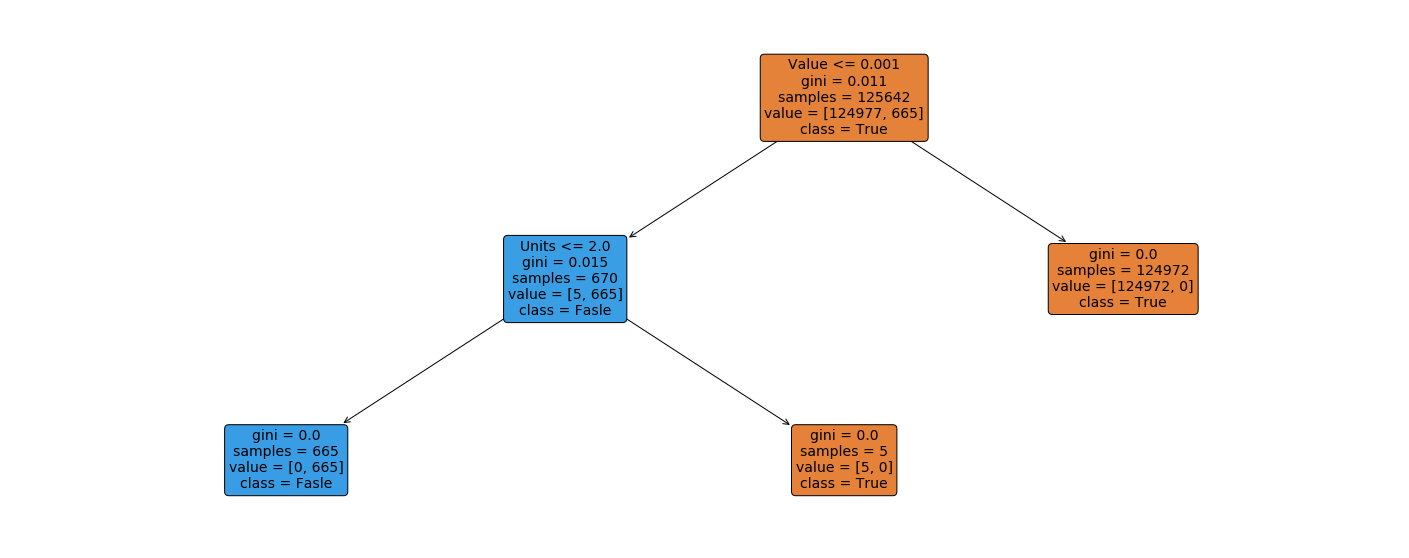

In [15]:
decision.fit(x_test,y_test)

plt.figure(figsize=(25,10))
a = plot_tree(decision, 
              feature_names=x, 
              class_names=(['True','Fasle']),
              filled=True, 
              rounded=True, 
              fontsize=14)

In [16]:
df.groupby(['Sensor','Type','Units'], as_index=False).size()

Sensor  Type  Units
0       0     0        29234
        1     1         2063
        2     0         2080
        3     0        29403
        4     0        29391
        6     3         2063
        7     0         2079
        8     0        29393
        9     4         2076
        10    0         2063
        11    5         2063
1       1     1        28546
        2     0        27147
        5     2        27166
        6     3        27928
        7     0        28564
        10    0        28549
2       0     0        26747
        1     1         1997
        3     0        26746
        4     0        26746
        6     3         1997
        7     0         2021
        8     0        26745
        9     4         2006
        10    0         1997
        11    5         1997
dtype: int64

C:\Users\HP\Anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


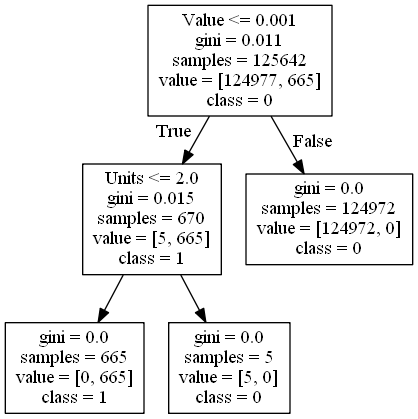

In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

x=['Sensor', 'Type', 'Units','Value']
dot_data = StringIO()
dot_data=tree.export_graphviz(decision, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x,class_names=(['True','Fasle']))
dot_data=tree.export_graphviz(decision, out_file=None,feature_names = x,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# import io
# dot_data = io.StringIO()
# tree.export_graphviz(decision, out_file=dot_data)

# graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
# # make sure you have graphviz installed and set in path
# Image(graph.create_png())


# dot_data = StringIO()
# tree.export_graphviz(decision, out_file=None,filled=True, rounded=True,
#                 feature_names = x,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [18]:
graph.write_pdf("123.pdf")

True

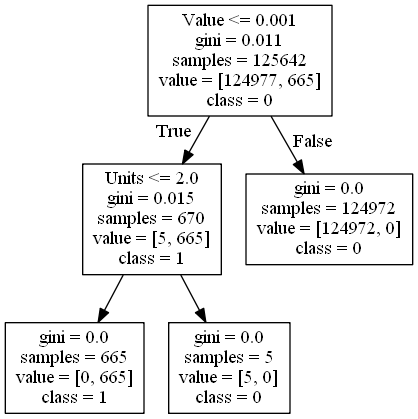

In [19]:
Image(graph.create_png())

In [21]:
df.time

0            13/05/2020 10:36
1         2020-05-27 21:11:38
2            14/05/2020 17:15
3         2020-05-17 05:56:00
4         2020-05-21 06:41:00
                 ...         
418802    2020-05-26 04:57:34
418803       17/05/2020 09:08
418804    2020-05-25 12:55:33
418805       14/05/2020 11:10
418806       15/05/2020 12:55
Name: time, Length: 418807, dtype: object

In [28]:
df["Date"]=pd.to_datetime(df["time"])

In [32]:
type(df["time"])

pandas.core.series.Series

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418807 entries, 0 to 418806
Data columns (total 7 columns):
Sensor    418807 non-null int64
Type      418807 non-null int64
Units     418807 non-null int64
time      418807 non-null object
Flag      418807 non-null float64
Value     418807 non-null float64
Date      418807 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 22.4+ MB


In [33]:
df.Date.head()

0   2020-05-13 10:36:00
1   2020-05-27 21:11:38
2   2020-05-14 17:15:00
3   2020-05-17 05:56:00
4   2020-05-21 06:41:00
Name: Date, dtype: datetime64[ns]